# Futebol brasileiro - GRUPO 1

## Contextualização

**Membros do Grupo 01:**
- Amanda Yamasaki
- Gabriel Grub
- Maria Dulce Matos
- Paulo Sergio
- Theo Borten


**Resumo:**

**Motivação:** 

Ao contrário de loterias numéricas ou jogos com dados (cujos dados são justos), a “loteria esportiva” do futebol não é caracterizada por seus números equiprováveis. No futebol, jogos costumeiramente têm times favoritos e fatores internos e externos não quantificados no cálculo de probabilidades - como o emocional dos jogadores e as condições do ambiente da partida. Levando essa subjetividade em consideração, pode-se dizer que há uma distribuição de probabilidade desigual entre os possíveis resultados. É com este tipo de problema que nos deparamos ao tentar tratar o Campeonato Brasileiro probabilisticamente, e então, realizamos hipóteses para verificar correlações e padrões-ocultos entre dados coletados sobre torneios dos últimos anos no Brasil. Logo, temos como objetivo destrinchar os inúmeros fatores que influenciam nas probabilidades de resultado de um jogo de futebol, e sobretudo analisar como esses detalhes se revelam através dos dados numéricos sobre torneios no Brasil.

## Hipóteses

**Hipóteses:**

1- O horário da partida influencia significativamente a dinâmica do jogo, demonstrando uma relação entre o horário de início e a quantidade de gols marcados.

2- Existe uma correlação positiva entre a classificação dos clubes nos campeonatos da Libertadores, Brasileirão e Copa do Brasil, indicando uma tendência consistente de desempenho entre essas competições.

3- Há uma correlação positiva entre o desempenho recente de um clube, medido pelos resultados dos três jogos anteriores, e o desempenho no jogo subsequente.


## Tratamento

### Importando as bibliotecas necessárias

In [1158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px


### Carregando as bases de dados

In [1192]:
brasileirao = pd.read_csv('brasileirao.csv')
copa_do_brasil = pd.read_csv("copa_do_brasil.csv")
libertadores = pd.read_csv("libertadores.csv")
brasileirao_gols = pd.read_csv("campeonato-brasileiro-gols.csv")
brasileirao_estatisticas = pd.read_csv("campeonato-brasileiro-estatisticas-full.csv")
brasileirao_full = pd.read_csv("campeonato-brasileiro-full.csv")

### Descrição das bases de dados

#### Brasileirão

In [1160]:
brasileirao.info() # Pegando informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         4180 non-null   object 
 1   home_team        4180 non-null   object 
 2   home_team_state  4180 non-null   object 
 3   away_team        4180 non-null   object 
 4   away_team_state  4180 non-null   object 
 5   home_goal        4098 non-null   float64
 6   away_goal        4098 non-null   float64
 7   season           4180 non-null   int64  
 8   round            4180 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 294.0+ KB


***Número de linhas:*** 4180

***Número de colunas:*** 9

***Memória alocada para a base de dados:*** 294.0+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(5)

***Tipo de dado de cada coluna:***

- Coluna 1: Data e hora (data)

- Coluna 2: Time da casa (string)

- Coluna 3: Estado do time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Estado do time visitante (string)

- Coluna 6: Gol em casa (ponto flutuante)

- Coluna 7: Gol fora de casa (ponto flutuante)

- Coluna 8: Temporada (inteiro)

- Coluna 9: Rodada (inteiro)

##### Distribuição dos valores das principais variáveis categóricas/strings

In [1161]:
print(f'Temporadas: {brasileirao["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {brasileirao["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Todos os clubes: 36


#### Copa do Brasil

In [1162]:
copa_do_brasil.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   round      1337 non-null   int64  
 1   datetime   1337 non-null   object 
 2   home_team  1337 non-null   object 
 3   away_team  1337 non-null   object 
 4   home_goal  1321 non-null   float64
 5   away_goal  1321 non-null   float64
 6   season     1337 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


***Número de linhas:*** 1337

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 73.2+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(3)

***Tipo de dado de cada coluna:***

- Coluna 1: Rodada (inteiro)

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (ponto flutuante)

- Coluna 6: Gol fora de casa (ponto flutuante)

- Coluna 7: Temporada (inteiro)

##### Distribuição dos valores das principais variáveis categóricas/strings

In [1163]:
print(f'Temporadas: {copa_do_brasil["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {copa_do_brasil["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Todos os clubes: 275


#### Libertadores

In [1164]:
libertadores.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1254 non-null   object 
 1   home_team  1255 non-null   object 
 2   away_team  1255 non-null   object 
 3   home_goal  1255 non-null   object 
 4   away_goal  1255 non-null   object 
 5   season     1254 non-null   float64
 6   stage      1255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


***Número de linhas:*** 1255

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 68.8+ KB

***Tipos de dados:***

- ponto flutuante(1)

- objeto(6)

***Tipo de dado de cada coluna:***

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (int)

- Coluna 6: Gol fora de casa (int)

- Coluna 7: Temporada (ponto flutuante)

- Coluna 7: Etapas do campeonato (string)

##### Distribuição dos valores das principais variáveis categóricas/strings

In [1165]:
print(f'Temporadas: {libertadores["season"].unique()}') #Temporadas a que se referem os dados

print(f'Etapas do campeonato: {libertadores["stage"].unique()}') #Etapas do campeonato

print(f'Total de clubes: {libertadores["home_team"].nunique()}') #Números de clubes que jogaram a libertadores ao longo desses anos

Temporadas: [2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.   nan]
Etapas do campeonato: ['group stage' 'final' 'semifinals' 'quarterfinals' 'round of 16']
Total de clubes: 114


### Limpeza dos dados

#### Filtrandos os anos indesejados

In [1166]:
valor_indesejado_copa_do_brasil = 2021
copa_do_brasil = copa_do_brasil.drop(copa_do_brasil[copa_do_brasil['season'] == valor_indesejado_copa_do_brasil].index)

valor_indesejado_brasileirao = 2022
brasileirao = brasileirao.drop(brasileirao[brasileirao['season'] == valor_indesejado_brasileirao].index)


#### Libertadores

In [1167]:
print(f'Valores nulos nos dados da Libertadores inicialmente: \n{libertadores.isna().sum()}\n')

libertadores.iloc[363, libertadores.columns.get_loc('home_goal')] = 0
libertadores.iloc[363, libertadores.columns.get_loc('away_goal')] = 3
libertadores.iloc[363, libertadores.columns.get_loc('home_goal')] = 0
libertadores.drop(index = 1254, inplace=True)

libertadores.replace('-', float('nan'), inplace=True)

libertadores['datetime'] = pd.to_datetime(libertadores['datetime']).astype('int64')
libertadores['home_goal'] = pd.to_numeric(libertadores['home_goal'])
libertadores['away_goal'] = pd.to_numeric(libertadores['away_goal'])

print(f'Valores nulos nos dados da Libertadores após a limpeza: \n{libertadores.isna().sum()}\n')

Valores nulos nos dados da Libertadores inicialmente: 
datetime     1
home_team    0
away_team    0
home_goal    0
away_goal    0
season       1
stage        0
dtype: int64

Valores nulos nos dados da Libertadores após a limpeza: 
datetime     0
home_team    0
away_team    0
home_goal    0
away_goal    0
season       0
stage        0
dtype: int64



#### Brasileirão

In [1168]:
print(f'Valores nulos nos dados do Brasileirão: \n{brasileirao.isna().sum()}\n')

brasileirao.iloc[1517, brasileirao.columns.get_loc('home_goal')] = 1
brasileirao.iloc[1517, brasileirao.columns.get_loc('away_goal')] = 3

brasileirao.replace('-', float('nan'), inplace=True) #Trocando as "-" por "Nan"

brasileirao['datetime'] = pd.to_datetime(brasileirao['datetime']).astype('int64')
brasileirao['home_goal'] = pd.to_numeric(brasileirao['home_goal'])
brasileirao['away_goal'] = pd.to_numeric(brasileirao['away_goal'])

print(f'Valores nulos nos dados do Brasileirão: \n{brasileirao.isna().sum()}\n')

Valores nulos nos dados do Brasileirão: 
datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          1
away_goal          1
season             0
round              0
dtype: int64

Valores nulos nos dados do Brasileirão: 
datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          1
away_goal          1
season             0
round              0
dtype: int64



#### Copa do Brasil

In [1169]:
print(f'Valores nulos nos dados do Copa do Brasil: \n{copa_do_brasil.isna().sum()}')

copa_do_brasil.replace('-', float('nan'), inplace=True)

copa_do_brasil['datetime'] = pd.to_datetime(copa_do_brasil['datetime']).astype('int64')
copa_do_brasil['home_goal'] = pd.to_numeric(copa_do_brasil['home_goal'])
copa_do_brasil['away_goal'] = pd.to_numeric(copa_do_brasil['away_goal'])

Valores nulos nos dados do Copa do Brasil: 
round        0
datetime     0
home_team    0
away_team    0
home_goal    0
away_goal    0
season       0
dtype: int64


## Insights

### Funções

In [1170]:
def won_match(team1, team2, result1, result2):
    """Recebe dois times, e os gols feitos por cada um no jogo, e retorna o nome do vencedor, e o empate caso não tenha"""
    if result1 == result2:  # draw
        return "Draw"
    if result2 > result1:  # result 2 ganha
        return team2
    else:
        return team1  # result 1 ganha


def classificação(data_frame):
    '''Recebe um data frame e retorna a tabela do df'''
    teams = data_frame["home_team"].unique()
    tabela = teams  # trbalhar com dicionarios)
    tabela = {team: 0 for team in tabela}
    for _, row in data_frame.iterrows():
        result = won_match(
            row["home_team"],
            row["away_team"],
            row["home_goal"],
            row["away_goal"],
        )
        if result != "Draw":
            tabela[result] += 3
        else:
            tabela[row["home_team"]] += 1
            tabela[row["away_team"]] += 1

    tabela = dict(
        sorted(tabela.items(), key=lambda x: x[1], reverse=True)
    )  # sort dos dados para ficar em ordem
    return tabela


def classificação_por_ano(data_frame, ano):
    '''Recebe o df e o ano e retorna a tabela no ano'''
    df_ano = data_frame[data_frame["season"] == ano]
    # Calcular e retornar a classificação para esse ano
    return classificação(df_ano)

t_2012 = classificação_por_ano(brasileirao, 2012)
t_2013 = classificação_por_ano(brasileirao, 2013)
t_2014 = classificação_por_ano(brasileirao, 2014)
t_2015 = classificação_por_ano(brasileirao, 2015)
t_2016 = classificação_por_ano(brasileirao, 2016)
t_2017 = classificação_por_ano(brasileirao, 2017)
t_2018 = classificação_por_ano(brasileirao, 2018)
t_2019 = classificação_por_ano(brasileirao, 2019)
t_2020 = classificação_por_ano(brasileirao, 2020)
t_2021 = classificação_por_ano(brasileirao, 2021)
t_2022 = classificação_por_ano(brasileirao, 2022)

### Organização dos dataframes

In [1171]:
# Formatando a coluna "datetime" para exibir apenas as horas e minutos
brasileirao['total_goal'] = brasileirao['home_goal'] + brasileirao['away_goal']
brasileirao['datetime'] = pd.to_datetime(brasileirao['datetime'])
brasileirao['time'] = brasileirao['datetime'].dt.strftime('%H:%M')

libertadores['datetime'] = pd.to_datetime(libertadores['datetime'])
libertadores['time'] = libertadores['datetime'].dt.strftime('%H:%M')

copa_do_brasil['total_goal'] = copa_do_brasil['home_goal'] + copa_do_brasil['away_goal']
copa_do_brasil['home_team_state'] = copa_do_brasil['home_team'].apply(lambda x: x.split(' - ')[1])
copa_do_brasil['datetime'] = pd.to_datetime(copa_do_brasil['datetime'])
copa_do_brasil['time'] = copa_do_brasil['datetime'].dt.strftime('%H:%M')


### Visualização dos dados

#### Média de gols por horário do jogo

##### Preparando os gráficos - "Média de gols por horário do jogo"

In [1172]:
# Agrupando o DataFrame 'brasileirao' por time e calculando a média dos gols
horarios = brasileirao.groupby('time')[["home_goal","away_goal"]].mean()

# Agrupando o DataFrame 'brasileirao' por time e contando o tamanho de cada grupo
tamanho_grupos = brasileirao.groupby('time').size()

# Selecionando apenas os times que têm 200 ou mais jogos disputados
times_mais_de_200 = tamanho_grupos[tamanho_grupos >= 200].index

# Filtrando o DataFrame 'horarios' para conter apenas as médias de gols dos times que têm 200 ou mais jogos disputados
horarios_filtrados_brasileirao = horarios.loc[times_mais_de_200]

In [1173]:
# Agrupando o DataFrame 'libertadores' por time e calculando a média dos gols
horarios = libertadores.groupby('time')[["home_goal","away_goal"]].mean()

# Agrupando o DataFrame 'libertadores' por time e contando o tamanho de cada grupo
tamanho_grupos = libertadores.groupby('time').size()

# Selecionando apenas os times que têm 100 ou mais jogos disputados
times_mais_de_100 = tamanho_grupos[tamanho_grupos >=  100].index

# Filtrando o DataFrame 'horarios' para conter apenas as médias de gols dos times que têm 100 ou mais jogos disputados
horarios_filtrados_libertadores = horarios.loc[times_mais_de_100]


In [1174]:
# Agrupando o DataFrame 'copa_do_brasil' por time e calculando a média dos gols
horarios = copa_do_brasil.groupby('time')[["home_goal","away_goal"]].mean()

# Agrupando o DataFrame 'brasileirao' por time e contando o tamanho de cada grupo
tamanho_grupos = copa_do_brasil.groupby('time').size()

# Selecionando apenas os times que têm 100 ou mais jogos disputados
times_mais_de_100 = tamanho_grupos[tamanho_grupos >= 100].index

# Filtrando o DataFrame 'horarios' para conter apenas as médias de gols dos times que têm 100 ou mais jogos disputados
horarios_filtrados_copa = horarios.loc[times_mais_de_100]

##### Plotando os gráficos - "Média de gols por horário do jogo"

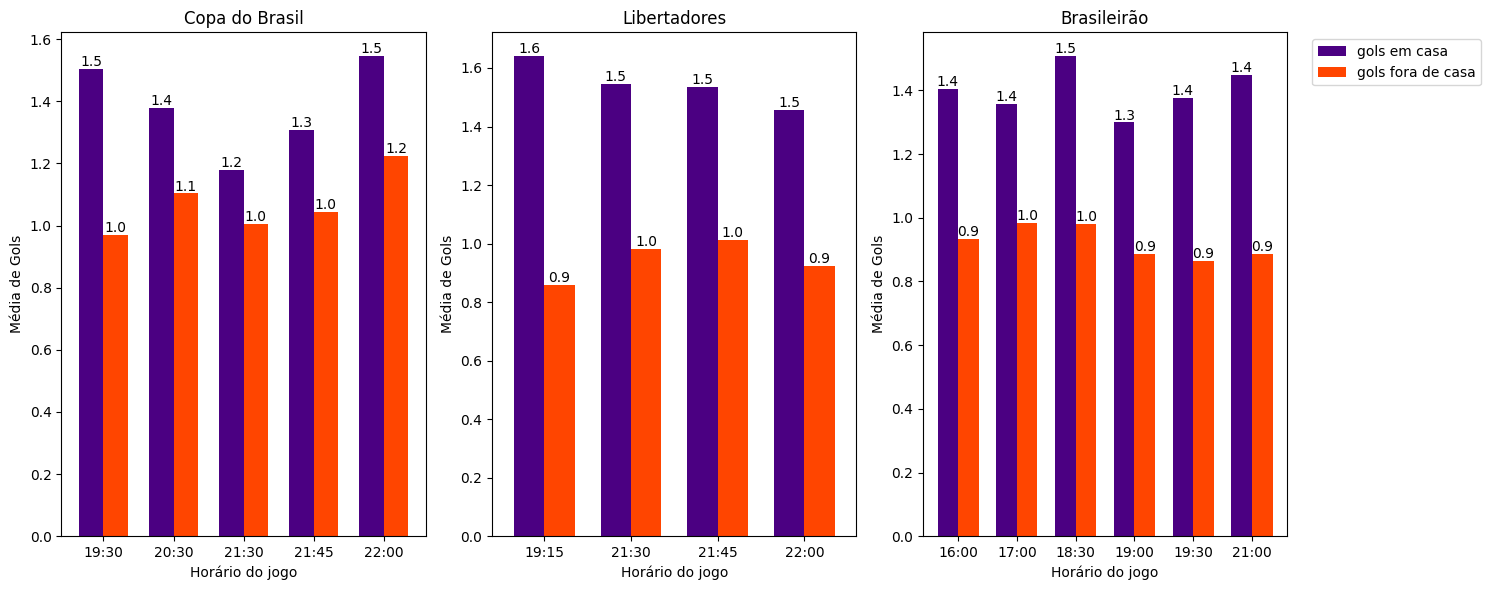

In [1175]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

bar_width = 0.7

horarios_filtrados_copa.plot(kind='bar', color=['Indigo', 'OrangeRed'], ax=axes[0], width=bar_width, legend=False)
horarios_filtrados_libertadores.plot(kind='bar', color=['Indigo', 'OrangeRed'], ax=axes[1], width=bar_width, legend=False)
horarios_filtrados_brasileirao.plot(kind='bar', color=['Indigo', 'OrangeRed'], ax=axes[2], width=bar_width, legend=False)

# Definindo as legendas do eixo x
axes[0].set_xlabel("Horário do jogo")
axes[1].set_xlabel("Horário do jogo")
axes[2].set_xlabel("Horário do jogo")

# Definindo as legendas do eixo x
axes[0].set_ylabel("Média de Gols")
axes[1].set_ylabel("Média de Gols")
axes[2].set_ylabel("Média de Gols")

# Rotacionando os valores do eixo x em 45 graus
axes[0].set_xticklabels(horarios_filtrados_copa.index, rotation=0)
axes[1].set_xticklabels(horarios_filtrados_libertadores.index, rotation=0)
axes[2].set_xticklabels(horarios_filtrados_brasileirao.index, rotation=0)

# Adicionando títulos individuais para cada subplot
axes[0].set_title("Copa do Brasil")
axes[1].set_title("Libertadores")
axes[2].set_title("Brasileirão")

# Adicionando os valores das barras acima de cada barra
for ax in axes:
    for p in ax.patches:
        ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Posicionando a legenda fora do gráfico para o terceiro gráfico (Brasileirão)
axes[2].legend(["gols em casa", "gols fora de casa"], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Ao observar as informações transmitidas pelos gráficos, infere-se que há uma influência pouco significativa entre o horário e a quantidade de gols marcados em uma partida. Isto é, visto que a diferença na média de gols varia apenas entre 0,1 e 0,3. Sabe-se que a quantidade de gols é refletida pela performance dos jogadores, cujo preparo físico e emocional não sofre grande impacto no espaço de poucas horas. É razoável considerar, portanto, que a pequena variação existente se dá pelo fato que a diferença de horários dos confrontos está diretamente relacionada com a quantidade do público presente. Apesar de não ser um fator determinante para a vitória ou derrota de um time (por isso se trata de uma variação pequena), a maior presença de um público nos estádios durante jogos comumente resulta em jogos mais agitados e competitivos o que resulta em mais gols. Desse modo, podemos concluir que não é o horário que influencia diretamente o placar de um jogo, mas sim outro fator relacionado ao horário, que é a presença da torcida. 

#### Média de gols por Estado

##### Preparando os gráficos - "Média de gols por Estado"

In [1176]:
x = pd.DataFrame(brasileirao.groupby('home_team_state')[["total_goal"]].mean())

y = pd.DataFrame(copa_do_brasil.groupby('home_team_state')[["total_goal"]].mean())

geo_json_data = 'https://raw.githubusercontent.com/giuliano-oliveira/geodata-br-states/main/geojson/br_states.json'


##### Plotando os gráficos - "Média de gols por Estado"

In [1177]:
fig1 = px.choropleth_mapbox(
    y,
    geojson=geo_json_data,
    locations=y.index,
    featureidkey='properties.SIGLA',
    color='total_goal',
    color_continuous_scale='turbid',
    range_color=(y['total_goal'].min(), y['total_goal'].max()),
    mapbox_style='carto-positron',
    center={"lat": -15.7801, "lon": -47.9292},
    zoom=2,
    hover_name=y.index,
    title = 'Média de gols por Estado - Copa do Brasil'
)

fig1.show()

fig2 = px.choropleth_mapbox(
    x,
    geojson=geo_json_data,
    locations=x.index,
    featureidkey='properties.SIGLA',
    color='total_goal',
    color_continuous_scale='turbid',
    range_color=(y['total_goal'].min(), y['total_goal'].max()),
    mapbox_style='carto-positron',
    center={"lat": -15.7801, "lon": -47.9292},
    zoom=2,
    hover_name=x.index,
    title = 'Média de gols por Estado - Brasileirão'
)

fig2.show()


No mapa que mostra o Campeonato Brasileiro, podemos observar que estados com times de menor investimento e popularidade têm médias de gol maiores. Podemos inferir que isso se dá uma vez que todos os times disputam a Copa do Brasil, e assim, quando times maiores são sorteados para jogar com aqueles de menor orçamento, os placares acabam sendo elásticos devido a diferença técnica entre os elencos. É razoável concluir, portanto, que essa é uma explicação para uma média elevada de gols nos estados da região Norte. Já em relação ao mapa que representa o Brasileirão, o gráfico revela uma maior uniformidade na distribuição de quantidade de gols, sendo viável inferir que isso pode ser justificado pelo fato de que todos os clubes se enfrentam, e por estarem na mesma série, apresentam uma maior equidade na competição. 

#### Média de gols por temporada

##### Preparando os gráficos - "Média de gols por temporada"

In [1178]:
temporadas_brasileirao = brasileirao.groupby('season')[["home_goal","away_goal"]].mean()
temporada_libertadores = libertadores.groupby('season')[["home_goal","away_goal"]].mean()
temporada_copa = copa_do_brasil.groupby('season')[["home_goal","away_goal"]].mean()


##### Plotando o gráfico - "Média de gols por temporada"

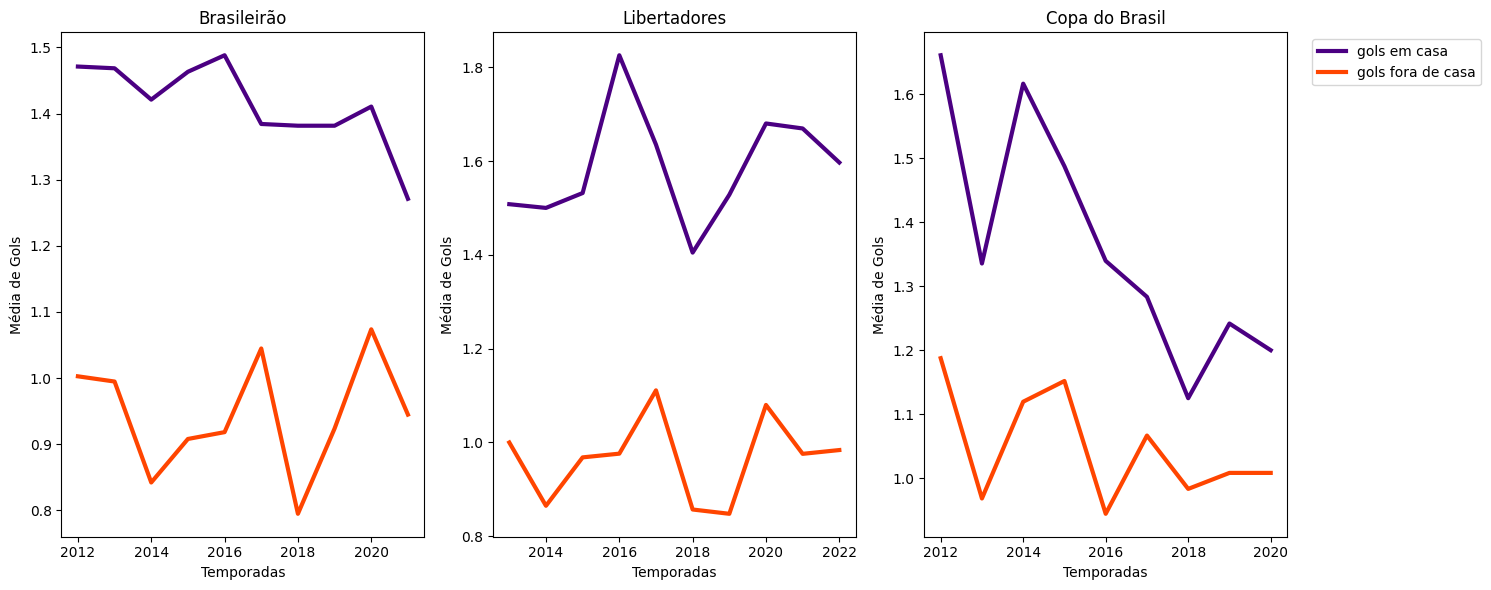

In [1179]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

temporadas_brasileirao.plot(kind='line', color=['Indigo', 'OrangeRed'], ax=axes[0], legend=False, linewidth=3)
temporada_libertadores.plot(kind='line', color=['Indigo', 'OrangeRed'], ax=axes[1], legend=False, linewidth=3)
temporada_copa.plot(kind='line', color=['Indigo', 'OrangeRed'], ax=axes[2], legend=False, linewidth=3)

# Definindo as legendas do eixo x
axes[0].set_xlabel("Temporadas")
axes[1].set_xlabel("Temporadas")
axes[2].set_xlabel("Temporadas")

# Definindo as legendas do eixo x
axes[0].set_ylabel("Média de Gols")
axes[1].set_ylabel("Média de Gols")
axes[2].set_ylabel("Média de Gols")

# Adicionando títulos individuais para cada subplot
axes[0].set_title("Brasileirão")
axes[1].set_title("Libertadores")
axes[2].set_title("Copa do Brasil")

# Posicionando a legenda fora do gráfico para o terceiro gráfico (Brasileirão)
axes[2].legend(["gols em casa", "gols fora de casa"], bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


Ao analisar os gráficos, algumas inferências podem ser realizadas. A primeira é que nos anos de Copa do Mundo (2014 e 2018), observamos uma menor média de gols por temporada. De modo geral, técnicos de times do mundo inteiro concordam que o calendário da famosa competição internacional "bagunça" a performance e rendimento da maioria dos times. Isto é, considerando a existência de jogos além da Copa, como amistosos e copas continentais. É comum que times sejam desfalcados devido a convocação de jogadores para a Seleção Brasileira, e assim, seus clubes sofrem com a falta dos seus melhores integrantes do elenco, resultando em partidas com menor integração e efetividade e, logo, menos gols. A segunda inferência é que no ano de 2020, a incidência de gols teve uma elevação notável. No ano da pandemia, jogos tiveram público apenas até março - o resto da temporada ocorria com os estádios vazios.  À medida que a falta da torcida tornava os jogos menos emocionantes e com pouca motivação, também removia a pressão sobre os jogadores, que assim, tornava os jogos mais rápidos e dinâmicos, resultando em mais gols.

#### Média de gols por etapa da Libertadores

##### Preparando os gráficos - "Média de gols por etapa da Libertadores"

In [1180]:
estagios_libertadores = libertadores.groupby('stage')[["home_goal", "away_goal"]].mean()

##### Plotando o gráfico - "Média de gols por etapa da Libertadores"

<Figure size 1200x600 with 0 Axes>

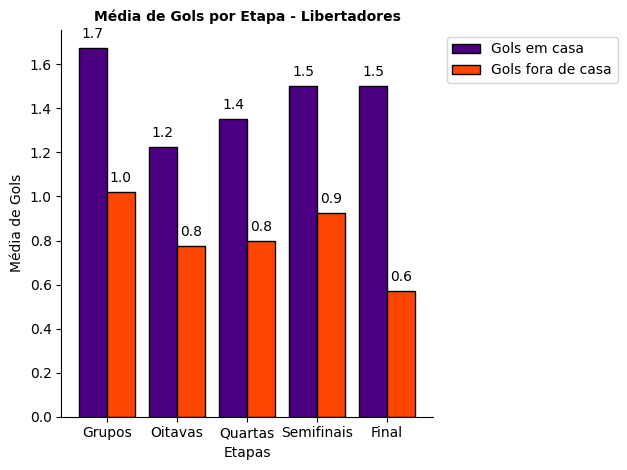

In [1181]:
# Mapear os nomes dos estágios para o português
estagios_em_portugues = {
    'final': 'Final',
    'group stage': 'Grupos',
    'quarterfinals': 'Quartas',
    'round of 16': 'Oitavas',
    'semifinals': 'Semifinais'
}

# Renomear o índice (stage) para os nomes em português
estagios_libertadores.index = estagios_libertadores.index.map(estagios_em_portugues)

# Reordenar os dados de acordo com a ordem do campeonato
ordem_do_campeonato = ['Grupos', 'Oitavas', 'Quartas', 'Semifinais', 'Final']
estagios_libertadores = estagios_libertadores.reindex(ordem_do_campeonato)
bar_width = 0.8

# Configurações estéticas
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Plotando o gráfico de barras empilhadas
estagios_libertadores.plot.bar(color=['Indigo', 'OrangeRed'], edgecolor='black', width=bar_width, linewidth=1)

# Adicionando títulos e rótulos
plt.title("Média de Gols por Etapa - Libertadores", fontsize=10, fontweight='bold')
plt.xlabel("Etapas", fontsize=10)
plt.ylabel("Média de Gols", fontsize=10)

# Removendo bordas direita e superior do gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points', fontsize=10)

# Posicionando a legenda fora do gráfico com o ajuste do bbox_to_anchor
plt.legend(["Gols em casa", "Gols fora de casa"], bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# Rotacionar o eixo x para horizontal
ax.tick_params(axis='x', rotation=0)

# Mostrando o gráfico
plt.tight_layout()
plt.show()

Em uma competição de mata-mata tão importante quanto a Libertadores, existe o aspecto fundamental de entender o peso do jogo para as equipes rivais. À medida que o campeonato se aproxima da final, a responsabilidade em não sofrer gols tende a aumentar o nível de concentração dos atletas, o que faz com que erros individuais decisivos diminuam, resultando em espaços para criação de ataque mais raros. Desse modo, a tendência é de haver cada vez menos gols ao longo da competição, além de serem placares apertados, como evidenciado pelo placar da última edição da competição em 2022, 1 x 0 Flamengo contra o Athletico PR. 

#### Média de gols por ano ímpar e par

##### Preparando o gráficos - "Média de gols por ano ímpar e par"

In [1185]:
valor_desejado_impar = [2013, 2015, 2017, 2019, 2021]
brasileirao_impar = brasileirao[brasileirao['season'].isin(valor_desejado_impar)]

valor_desejado_par = [2012, 2014, 2016, 2018, 2020]
brasileirao_par = brasileirao[brasileirao['season'].isin(valor_desejado_par)]

brasileirao_impar_gols = brasileirao_impar.groupby('season')[['home_goal', 'away_goal']].mean()
brasileirao_par_gols = brasileirao_par.groupby('season')[['home_goal', 'away_goal']].mean()

# Filtrar apenas os anos ímpares
brasileirao_impar_gols = brasileirao_impar_gols[brasileirao_impar_gols.index % 2 != 0]

# Combinação dos DataFrames
brasileirao_combined_gols = pd.concat([brasileirao_impar_gols, brasileirao_par_gols])


##### Plotando o gráfico - "Média de gols por ano ímpar e par"

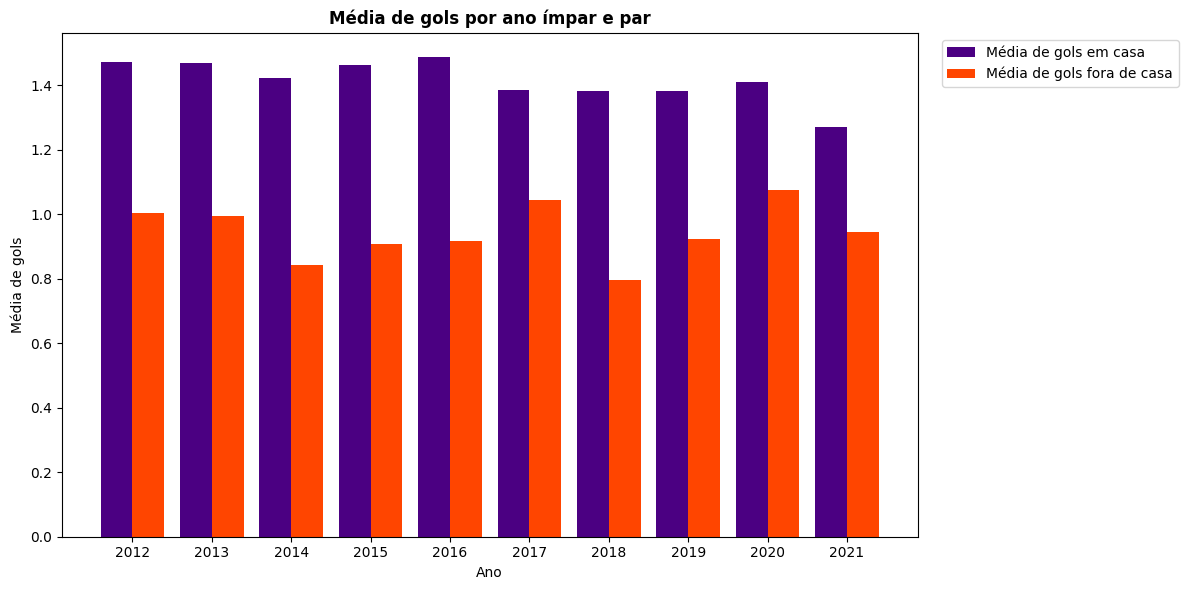

In [1186]:
# Plotar o gráfico de barras em um único subplot
plt.figure(figsize=(12, 6))

# Definindo a largura das barras para melhor visualização
bar_width = 0.4

# Anos ímpares
plt.bar(brasileirao_combined_gols.index - bar_width/2, brasileirao_combined_gols['home_goal'], label='Média de gols em casa', width=bar_width, color='Indigo')
plt.bar(brasileirao_combined_gols.index + bar_width/2, brasileirao_combined_gols['away_goal'], label='Média de gols fora de casa', width=bar_width, color='OrangeRed')

# Anos pares
plt.bar(brasileirao_par_gols.index - bar_width/2, brasileirao_par_gols['home_goal'], width=bar_width, color='Indigo')
plt.bar(brasileirao_par_gols.index + bar_width/2, brasileirao_par_gols['away_goal'], width=bar_width, color='OrangeRed')

plt.xlabel('Ano', fontsize=10)
plt.ylabel('Média de gols', fontsize=10)
plt.title('Média de gols por ano ímpar e par', fontweight='bold')

# Posicionando a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Rotacionar a legenda do eixo x
plt.xticks(brasileirao_combined_gols.index, rotation=0)

plt.tight_layout()
plt.show()


Ao analisar o gráfico que relaciona a média de gols com a variável de anos pares e ímpares, notamos que há pouca, ou melhor, praticamente nenhuma relação entre ambos fatores. Portanto, ao observar uma semelhança entre os anos consecutivos, conclui-se que a paridade ou não-paridade dos anos reflete pouca informação sobre a performance de times brasileiros em competições domésticas e continentais. 

## Conclusão

???

In [1193]:
brasileirao_gols.head()
brasileirao_estatisticas.tail()
brasileirao_full.tail()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP
8024,8025,38,13/11/2022,16:03,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,J. Ribeiro Ventura,R. Ceni,Sao Paulo,Estádio da Serrinha,0,4,GO,SP
